# ABS Monthly Consumer Price Index Indicator 6484

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from plotting import (
    finalise_plot,
    set_chart_dir,
    clear_chart_dir,
    plot_growth,
)
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    find_id,
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

# plotting stuff
plt.style.use("fivethirtyeight")

In [2]:
catalogue_id = "6484"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)
set_chart_dir(CHART_DIR)

## Get data from ABS

In [3]:
# do the data capture and extraction to a DataFrame
abs_dict = get_ABS_meta_and_data(catalogue_id, verbose=False)
if abs_dict is None:
    sys.exit(-1)

Found URL for a ZIP file on ABS web page
We need to download this file from the ABS ...
Saving ABS download to cache.
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)

### Remove the old charts
We do this because the top expenditue item charts are uniquely named

In [5]:
clear_chart_dir(CHART_DIR)

### Functions

In [6]:
def annualise_percentages(series: pd.Series, periods: int = 12) -> pd.Series:
    """Annualise a growth rate for a period."""

    s = series / 100.0
    annual = (((1 + s) ** periods) - 1) * 100
    return annual

### Plot growth - combined line/bar charts

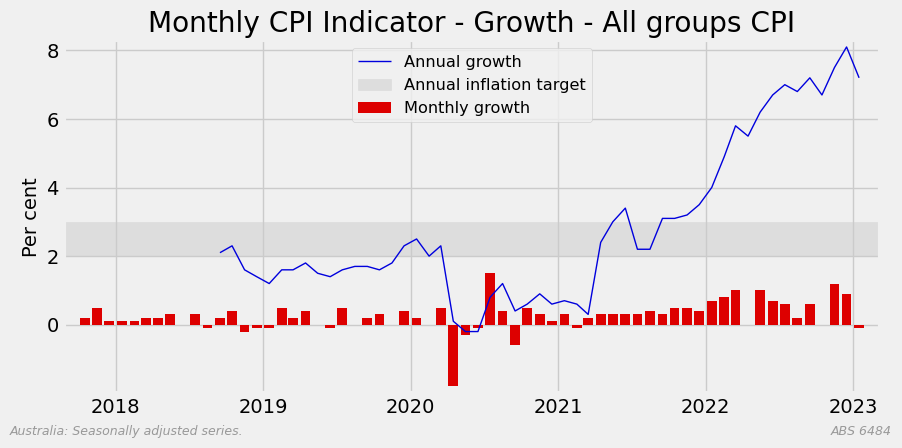

In [7]:
series_type = "Seasonally Adjusted"
change = "Percentage Change"
annual = "Corresponding Month of Previous Year"
monthly = "from Previous Period"
did_col = "Data Item Description"
type_col = "Series Type"
table_col = "Table"

for series_name in ["All groups CPI", "Trimmed Mean"]:
    if not meta[did_col].str.contains(series_name).any():
        continue

    data = []
    for period in annual, monthly:
        selector = {
            series_type: type_col,
            period: did_col,
            series_name: did_col,
            change: did_col,
        }
        series_id, units = find_id(meta, selector, verbose=False)
        table = meta.loc[meta["Series ID"] == series_id, "Table"].values[0]
        data.append(abs_dict[table][series_id])

    ax = plot_growth(*data)
    if ax:
        ax.axhspan(2, 3, color="#dddddd", zorder=-1, label="Annual inflation target")
        ax.legend(loc="best", fontsize="small")
        finalise_plot(
            ax,
            title=f"Monthly CPI Indicator - Growth - {series_name}",
            ylabel="Per cent",
            rfooter=f"{source}",
            lfooter=f"Australia: {series_type.capitalize()} series. ",
            show=True,
        )

### Selected sub items

In [8]:
selectors = {
    "Food and non-alcoholic beverages": {
        "Food and non-alcoholic beverages": did_col,
        "Original": type_col,
        annual: did_col,
    },
    "Automotive fuel": {
        "Automotive fuel": did_col,
        "Original": type_col,
        annual: did_col,
    },
}

data = pd.DataFrame()
for name, selector in selectors.items():
    id, units = find_id(meta, selector, verbose=False)
    table = meta.loc[meta["Series ID"] == id, "Table"].values[0]
    data[name] = abs_dict[table][id]

ax = data.dropna().plot(lw=2.5)
ax.legend(loc="best", fontsize="small")
title = "Monthly CPI Indicator - Annual Growth - Food & Fuel"
tag = "1"
series_type = "Original series"
finalise_plot(
    ax,
    title=title,
    ylabel="Per cent",
    tag=tag,
    rfooter=f"{source}",
    lfooter=f"Australia: {series_type}",
    # show=True,
)

In [9]:
selectors = {
    "Rents": {
        "Rents": did_col,
        "Original": type_col,
        annual: did_col,
    },
    "New dwelling purchase by owner-occupiers": {
        "New dwelling purchase by owner-occupiers": did_col,
        "Original": type_col,
        annual: did_col,
    },
}

data = pd.DataFrame()
for name, selector in selectors.items():
    id, units = find_id(meta, selector, verbose=False)
    table = meta.loc[meta["Series ID"] == id, "Table"].values[0]
    data[name] = abs_dict[table][id]

ax = data.dropna().plot(lw=2.5)
ax.legend(loc="best", fontsize="small")
title = "Monthly CPI Indicator - Annual Growth - Residential"
tag = "2"
series_type = "Original series"
finalise_plot(
    ax,
    title=title,
    ylabel="Per cent",
    tag=tag,
    rfooter=f"{source}",
    lfooter=f"Australia: {series_type}",
    # show=True,
)

## Finished

In [10]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Thu Mar 02 2023 06:27:33

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.11.0

pandas    : 1.5.3
matplotlib: 3.7.0
sys       : 3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]

Watermark: 2.3.1



In [11]:
print("Done")

Done
